# Insolation

<i>© Von P. Walden, Washington State University</i>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Calculates the insolation at the top of the atmosphere (TOA) as a function of time and location.

#### Solar flux per unit area at TOA (Equations from Hartmann, <i>Global Physical Climatology</i>)

$$Q = S_o (d_m/d)^2 \cos(\theta_s)$$ 
where So is the solar "constant", dm is the mean distance between the Earth and Sun, d is the actual distance between the Earth and Sun, and theta(s) is the solar zenith angle.

$\delta = -23.44^{\circ}\cos{[(t_j+10 days)*(360^{\circ}/365.25 days)]}$ is the declination angle.

$\cos{\theta_s} = \sin{\phi}sin{\delta} + \cos{\phi}\cos{\delta}\cos{h}$, where phi is the latitude and h is the hour angle.

$h=(12-t)*(15^{\circ} / 1 hour)$, where t is the local time and 15 is the number of degrees that the Earth rotates in one hour.  The conversion factor converts hours to degrees.

$Q_{dayavg} = (S_o/\pi)(d_m/d)^2[h_o\sin{\phi}\sin{\delta}+\cos{\phi}\cos{\delta}\sin{h_o}]$, where $h_o = -\tan{\phi}\tan{\delta}$.

In [2]:
def earth_sun_distance(day):
    a     = 149.6e6                   # km
    e     = 0.017
    theta = day * ((2*np.pi) / 365.25)     # This is only an approximation.
    r = a*(1-e*e)/(1+e * np.cos(theta))
    return r


In [3]:
def declination(day):
    d = -23.44 * np.cos( (2.*np.pi) / 365.25 * (day + 10) )   # Approximate
    return d


In [4]:
def solar_zenith_angle(latitude,declinationAngle,hour):
    # All angles must be in radians !!
    latitude = latitude * (np.pi/180.)
    declinationAngle = declinationAngle * (np.pi/180.)
    h = 15. * (12. - hour) * (np.pi/180.)
    sza = np.arccos(np.sin(latitude)*np.sin(declinationAngle) + np.cos(latitude)*np.cos(declinationAngle)*np.cos(h))
    return sza


In [5]:
def Qday_avg(latitude,day):
    lat = latitude*(np.pi/180.)
    So  = 1370.
    d   = earth_sun_distance(day)
    dm  = 149.6e6
    da  = declination(day) * (np.pi/180.)
    tmp = np.tan(lat)*np.tan(da)
    # Obtain this condition from http://en.wikipedia.org/wiki/Insolation
    if tmp>1:
        ho = np.pi
    elif tmp<-1:
        ho = 0.
    else:
        ho  = np.arccos(-1.*np.tan(lat)*np.tan(da))
    Q   = (So/np.pi) * (dm/d)**2 * (ho*np.sin(lat)*np.sin(da) + np.cos(lat)*np.cos(da)*np.sin(ho))
    return Q


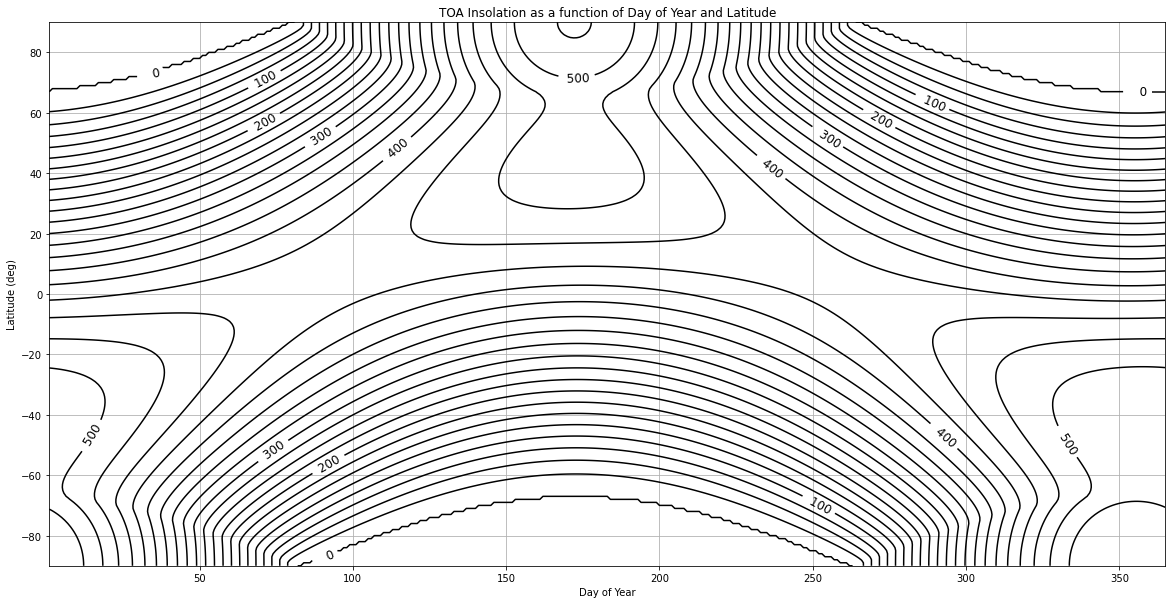

In [6]:
lats = np.arange(-90.,91.)
days = np.arange(1.,366.)

Q = np.array([])
for lat in lats:
    for day in days:
        Q = np.append(Q, Qday_avg(lat,day))

Qn = np.reshape(Q,(181,365))
plt.figure(figsize=(20,10))
#CS=contourf(days, lats, Qn, range(0,550,50), cmap=plt.cm.RdBu_r)
CS=plt.contour(days, lats, Qn, range(0,550,25), colors='k')
plt.clabel(CS, range(0,550,100) ,inline=1,fmt='%4.0f',fontsize=12)
plt.grid()
plt.xlabel('Day of Year');
plt.ylabel('Latitude (deg)');
plt.title('TOA Insolation as a function of Day of Year and Latitude');

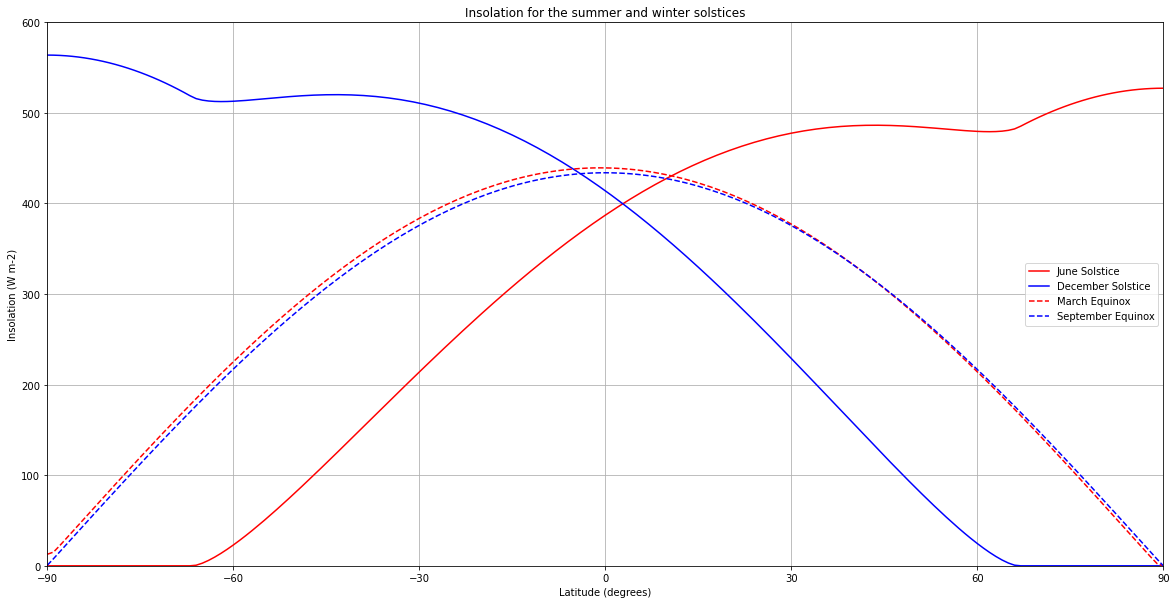

In [7]:
mar20 = 31+28+20
jun21 = 31+28+31+30+31+21
sep20 = 31+28+31+30+31+30+31+31+20
dec21 = 355
plt.figure(figsize=(20,10))
plt.plot(lats,Qn[:,jun21],'r',lats,Qn[:,dec21],'b')
plt.plot(lats,Qn[:,mar20],'r--',lats,Qn[:,sep20],'b--')
#plt.plot(lats,Qn.mean(axis=1),'k')                      # Annual mean
plt.axis([-90., 90., 0., 600])
plt.grid()
plt.xticks(np.arange(-90., 90.+1, 30.))
plt.xlabel('Latitude (degrees)');
plt.ylabel('Insolation (W m-2)');
plt.title('Insolation for the summer and winter solstices');
plt.legend(['June Solstice', 'December Solstice', 'March Equinox', 'September Equinox'])